In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import itertools
import json
import sklearn 
import sklearn.decomposition
import sklearn.manifold
import numpy as np
import pandas as pd

class PCATSNE(sklearn.manifold.TSNE):
    
    def __init__(self, pca_kwargs, **kwargs):
        super().__init__(**kwargs)
        self.pca_kwargs = pca_kwargs
        self.pca = sklearn.decomposition.PCA(**pca_kwargs)
        
    def fit_transform(self, X):
        # First do PCA
        X = self.pca.fit_transform(X)
        # Then do tSNE on PCA transform
        X = super().fit_transform(X)
        return X
    

In [2]:
fname = '../embeddings/cifar_100_davinci-001.json'
with open(fname, 'r') as f:
    embeddings = json.load(f)

In [3]:
n = 20
X = np.asarray(list(embeddings.values()))
X = X[:5*n, :]

In [234]:
#tf = sklearn.manifold.TSNE(n_components=2, random_state=0, method='exact', n_iter=10000, learning_rate='auto', init='pca', perplexity=3.5)
tf = sklearn.manifold.LocallyLinearEmbedding(n_neighbors=15, reg=0, random_state=0, n_components=2, max_iter=1e4, method='modified', eigen_solver='dense')
#tf = sklearn.decomposition.PCA(n_components=2)
tf = PCATSNE(pca_kwargs={'n_components': 100, 'random_state': 1}, n_components=2, random_state=0, method='exact', n_iter=20000, n_iter_without_progress=500, min_grad_norm=1e-8, learning_rate='auto', init='pca', perplexity=5)
#tf = sklearn.manifold.TSNE(n_components=2, random_state=0, method='exact', n_iter=20000, n_iter_without_progress=500, min_grad_norm=1e-8, learning_rate='auto', init='pca', perplexity=5)
transformed = tf.fit_transform(X)

In [235]:
df = pd.DataFrame(transformed)

In [236]:
df = df.rename(columns={0: "x1", 1: "x2"})

In [237]:
groups = [i for ii in zip(*itertools.repeat(range(n), 5)) for i in ii ]
names = list(embeddings.keys())


/Users/mpaulus/miniconda3/envs/lml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'x2')

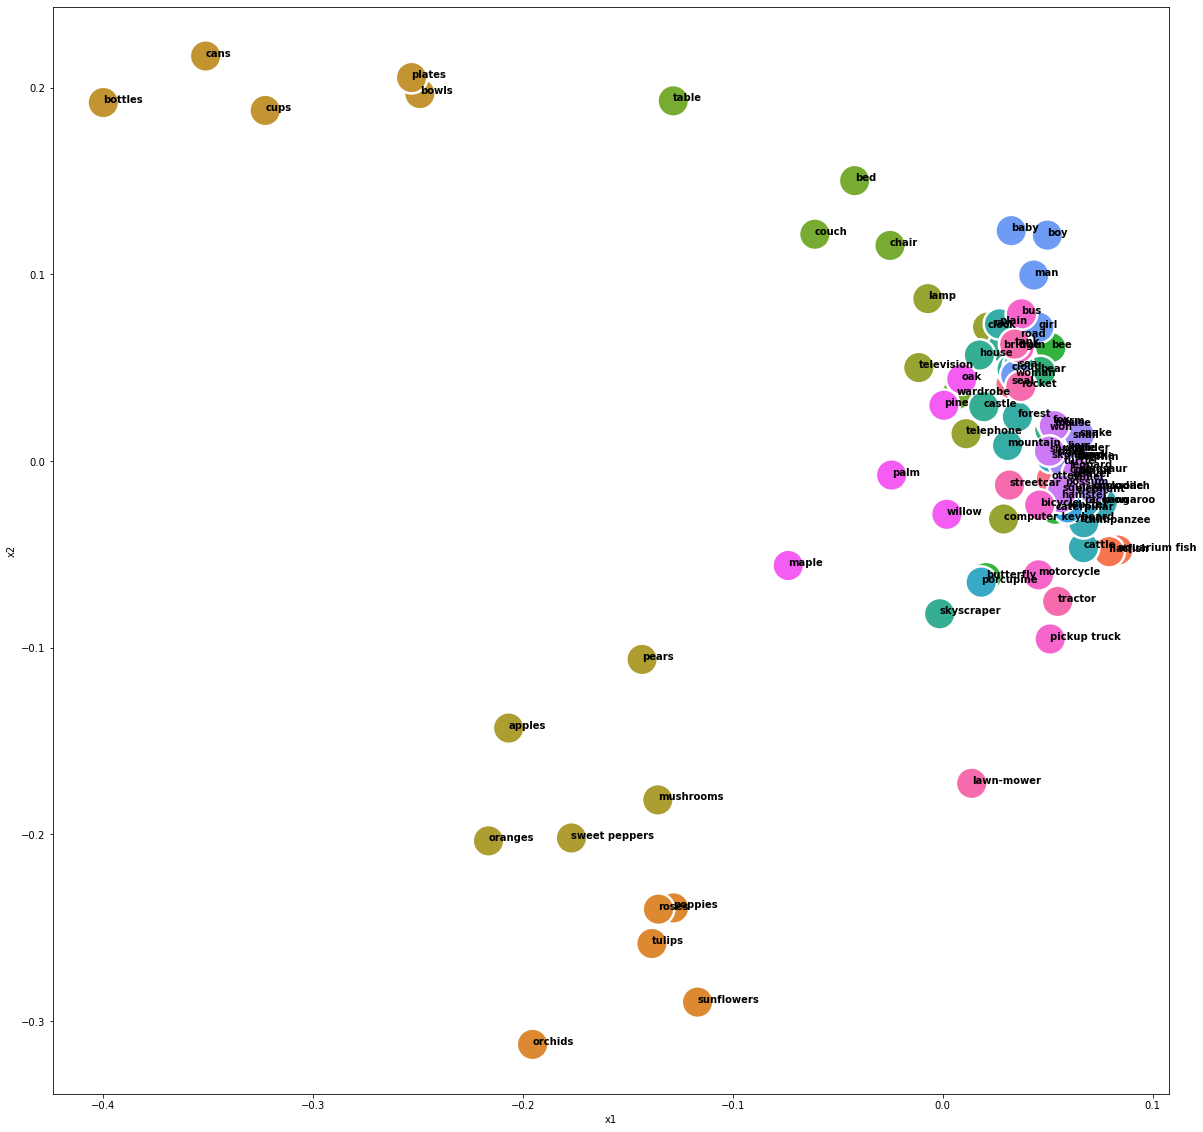

In [238]:
plt.figure(figsize=(20,20))
p1 = sns.scatterplot('x1', # Horizontal axis
       'x2', # Vertical axis
       hue=groups,
       data=df, # Data source
       legend=False, 
       s=1000,
       palette=sns.color_palette("husl", n))  

for line in range(0,df.shape[0]):
     p1.text(df.x1[line], df.x2[line], 
     names[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

# Set x-axis label
plt.xlabel('x1')
# Set y-axis label
plt.ylabel('x2')
#plt.savefig('../results/cifar100_tsne2d.pdf')